In [1]:
#install kaggle
!pip install kaggle

In [2]:
#configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Importing twitter sentiment dataset
#API to fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

 98% 79.0M/80.9M [00:00<00:00, 155MB/s]
100% 80.9M/80.9M [00:00<00:00, 150MB/s]


In [4]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/sentiment140.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [5]:
#import dependencies
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
#printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# Data Processing
#Loading the data from csv file to pandas dataframe
twitter_data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')

In [9]:
#checking the number of rows and column
twitter_data.shape

(1599999, 6)

In [10]:
#printing the first 5 rows of the dataframe
twitter_data.head(20)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [11]:
#Naming the columns and reading the dataset again
column_names=['target','id','date','flag','user','text','Labels']
twitter_data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',names=column_names,encoding='ISO-8859-1')

In [12]:
#checking the number of rows and column
twitter_data.shape

(1600000, 7)

In [13]:
#printing the first 5 rows of the dataframe
twitter_data.head()

,target,id,date,flag,user,text,Labels
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",NaN
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,NaN
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,NaN
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,NaN
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",NaN


In [14]:
#counting the number of missing values in the dataset
twitter_data.isnull().sum()

target          0
id              0
date            0
flag            0
user            0
text            0
Labels    1600000
dtype: int64

In [15]:
#checking the distribution of target column
twitter_data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [16]:
#convert the target "4" to "1"
twitter_data.replace({'target':{4:1}},inplace=True)

In [17]:
#checking the distribution of target column
twitter_data['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [18]:
#Stemming-It is the processing of reducing a word to its Root word
port_stem=PorterStemmer()

In [19]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word)for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [ ]:
twitter_data['stemmed_content']=twitter_data['text'].apply(stemming)

In [ ]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [ ]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [ ]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [ ]:
#Seperating the data and label
X=twitter_data['stemmed_content'].values
Y=twitter_data['target'].values

In [ ]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


In [ ]:
#Splitting the data to training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [ ]:
print(X_train)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [ ]:
print(X_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


In [ ]:
#Converting the textual data into numerical data
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 443066)	0.4484755317023172
  (0, 235045)	0.41996827700291095
  (0, 109306)	0.3753708587402299
  (0, 185193)	0.5277679060576009
  (0, 354543)	0.3588091611460021
  (0, 436713)	0.27259876264838384
  (1, 160636)	1.0
  (2, 288470)	0.16786949597862733
  (2, 132311)	0.2028971570399794
  (2, 150715)	0.18803850583207948
  (2, 178061)	0.1619010109445149
  (2, 409143)	0.15169282335109835
  (2, 266729)	0.24123230668976975
  (2, 443430)	0.3348599670252845
  (2, 77929)	0.31284080750346344
  (2, 433560)	0.3296595898028565
  (2, 406399)	0.32105459490875526
  (2, 129411)	0.29074192727957143
  (2, 407301)	0.18709338684973031
  (2, 124484)	0.1892155960801415
  (2, 109306)	0.4591176413728317
  (3, 172421)	0.37464146922154384
  (3, 411528)	0.27089772444087873
  (3, 388626)	0.3940776331458846
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 390130)	0.22064742191076112
  (1279996, 434014)	0.2718945052332447
  (1279996, 318303)	0.21254698865277746
  (1279996, 237899)	0.2236567560099234
  (1279996, 2910

In [ ]:
print(X_test)

  (0, 420984)	0.17915624523539803
  (0, 409143)	0.31430470598079707
  (0, 398906)	0.3491043873264267
  (0, 388348)	0.21985076072061738
  (0, 279082)	0.1782518010910344
  (0, 271016)	0.4535662391658828
  (0, 171378)	0.2805816206356073
  (0, 138164)	0.23688292264071403
  (0, 132364)	0.25525488955578596
  (0, 106069)	0.3655545001090455
  (0, 67828)	0.26800375270827315
  (0, 31168)	0.16247724180521766
  (0, 15110)	0.1719352837797837
  (1, 366203)	0.24595562404108307
  (1, 348135)	0.4739279595416274
  (1, 256777)	0.28751585696559306
  (1, 217562)	0.40288153995289894
  (1, 145393)	0.575262969264869
  (1, 15110)	0.211037449588008
  (1, 6463)	0.30733520460524466
  (2, 400621)	0.4317732461913093
  (2, 256834)	0.2564939661498776
  (2, 183312)	0.5892069252021465
  (2, 89448)	0.36340369428387626
  (2, 34401)	0.37916255084357414
  :	:
  (319994, 123278)	0.4530341382559843
  (319995, 444934)	0.3211092817599261
  (319995, 420984)	0.22631428606830145
  (319995, 416257)	0.23816465111736276
  (319995, 3

In [ ]:
#Training the machine learning model
model=LogisticRegression(max_iter=1000)


In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Model Evaluation
#Acurracy Score on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [ ]:
print("Accuracy score on the training data:",training_data_accuracy)

Accuracy score on the training data: 0.81018984375


In [ ]:
#Acurracy Score on training data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [ ]:
print("Accuracy score on the test data:",test_data_accuracy)

Accuracy score on the test data: 0.7780375


In [ ]:
#Saving the trained model
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#Using the saved model for future prediction
loaded_model=pickle.load(open('/content/trained_model.sav','rb'))

In [ ]:
X_new=X_test[200]
print(Y_test[200])
prediction=model.predict(X_new)
print(prediction)

if(prediction[0]==0):
  print("Negative Tweet")
else:
  print('Positive Tweet')

1
[1]
Positive Tweet


In [ ]:
X_new=X_test[3]
print(Y_test[3])
prediction=model.predict(X_new)
print(prediction)

if(prediction[0]==0):
  print("Negative Tweet")
else:
  print('Positive Tweet')

0
[0]
Negative Tweet


In [ ]:
#frequent words visualization for Positive tweets
all_words=" ".join([sentence for sentence in twitter_data['stemmed_content'][twitter_data['target']==1]])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()#frequent words visualization for Positive tweets


NameError: name 'WordCloud' is not defined

In [ ]:
!pip install wordcloud

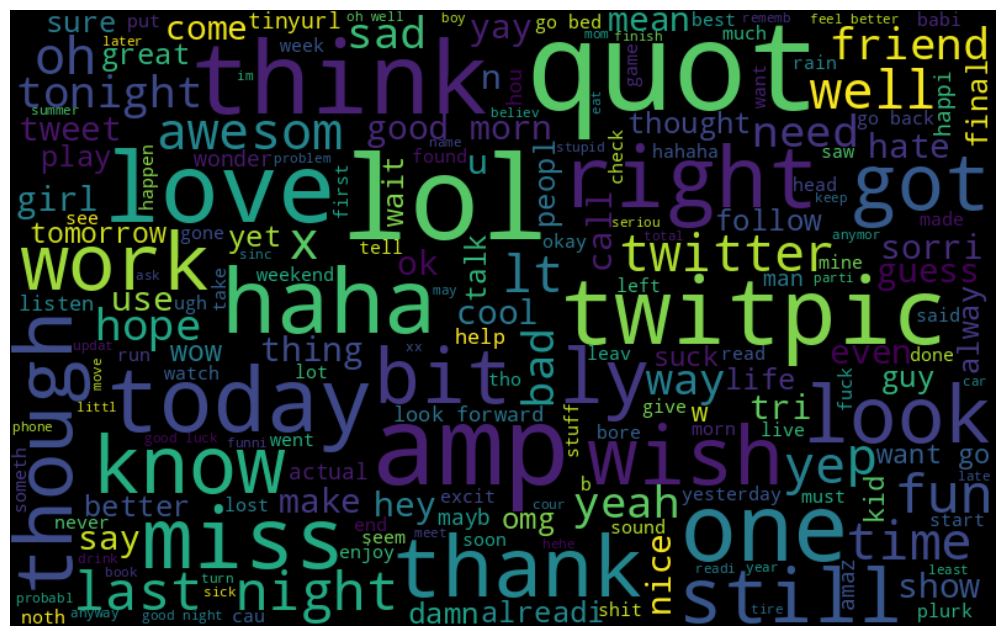

In [ ]:
from matplotlib import pyplot as plt
all_words=" ".join([sentence for sentence in twitter_data['stemmed_content']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

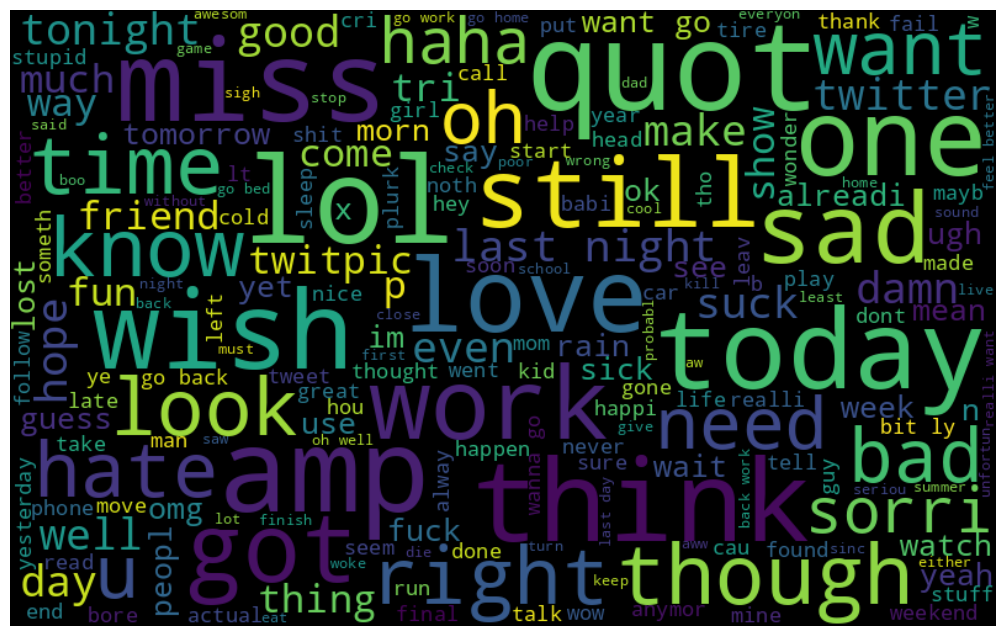

In [ ]:
#frequent words visualization for Negative tweets
all_words=" ".join([sentence for sentence in twitter_data['stemmed_content'][twitter_data['target']==0]])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# using Support vector machine

In [ ]:
#import libraries for svm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
#Seperating the data and label
tfidf=TfidfVectorizer(max_features=5000)
X=twitter_data['stemmed_content'].values
Y=twitter_data['target'].values

X=tfidf.fit_transform(X)

In [ ]:
#Splitting the data to training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
clf=LinearSVC()
clf.fit(X_train,Y_train)

LinearSVC()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    159815
           1       0.75      0.80      0.77    160185

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model','wb'))